# Imports

## **Libraries and Packages**

In [1]:
# import packages
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
# allow more collumns and rows to be seen
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn import metrics
import scipy.stats as stats
from scipy import stats
!pip install haversine 
import haversine as hs

## **Training Data**

In [2]:
# read in dataframe
df = pd.read_csv('kc_house_data_train.csv', index_col = 0) # index_col = 0 removes first column, "Unnamed: 0"

# check data
print(df.shape)
df.head()

(17290, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


# Exploratory Data Analysis

## Explore

In [3]:
# overview of data statitics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [4]:
# column oject dtypes
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Overview of dataframe before cleaning

Visualize any possible relationships between each house criteria and its price and identify any possible trends. 

['id', 'date', 'yr_sold', 'price', 'lat', 'long', 'zipcode']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']


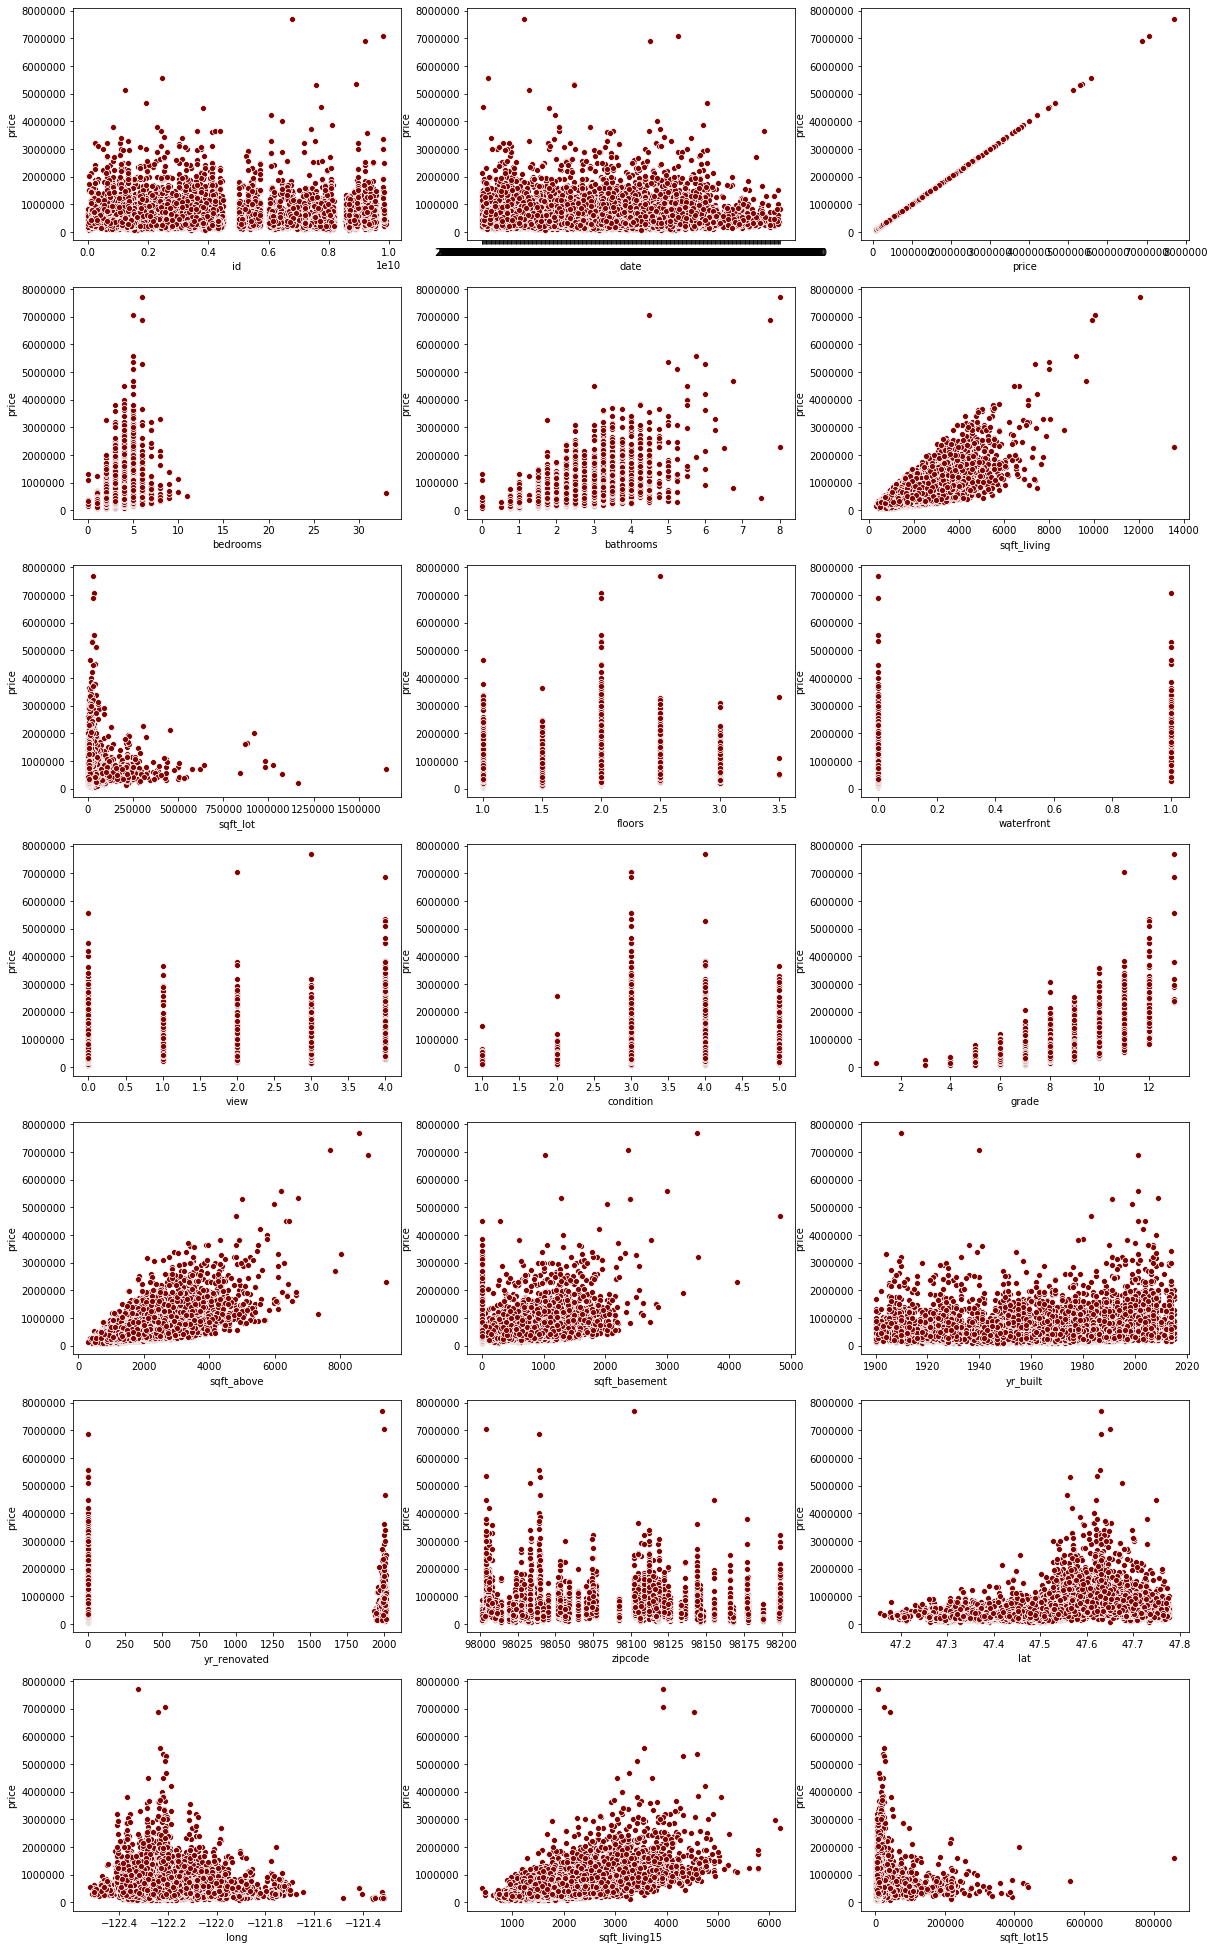

In [5]:
# subset dataframe to leave out these columns
leave = ['id','date', 'yr_sold', 'price', 'lat', 'long', 'zipcode']
# keep these columns to visualize 
keep = [x for x in df.columns if x not in leave]
# check your columns are correctly subsetted
print(leave)
print(keep)

fig, axes = plt.subplots (nrows=7, ncols=3, figsize=(20,35))

# use for loops to display each scatterplot
for i, column in enumerate(df):
    sns.scatterplot(data=df, x=column, y='price', ax=axes[i//3, i%3], color = 'maroon')

# Data Cleaning

## Date column

In [6]:
# check dtype and structure
df['date'].head()

0    20141006T000000
1    20140821T000000
2    20140815T000000
3    20150331T000000
4    20140714T000000
Name: date, dtype: object

In [7]:
# create a new array with only dates (uncleaned)
dates_1 = df['date'].values
# create a new list to hold the cleaned dates
dates = []
for x in dates_1:
    date = x[:8] # take only first 8 characters
    dates.append(date) # add to emplty list
    
# display new list an check the length is consistant
len(dates)

17290

In [8]:
# replace the old unclean dates column with new column and check dype
df['date'] = dates
df.dtypes 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
# create another array with cleaned dates
xs = df.date.values
# new list for formated date values
formated = []
for x in xs:
#     formate dates as years assigned to first 4 charaacters, months to next 2, and day to last 2
    formats = datetime(year = int(x[:4]), month = int(x[4:6]), day = int(x[6:8]))
#     add formated dates to new list
    formated.append(formats)

# format the dates so they all have the same format
# new list to hold months
formated_month = []
# new list to hold years
formated_year = []
for x in formated:
    formats_month = x.strftime('%b') # %b returns letter abbreviation of months
    formats_year = x.strftime('%Y') # %Y returns full 4 number year
    formated_month.append(formats_month)
    formated_year.append(formats_year)
    
# check df length consistancy
print(len(formated_month))
print(len(formated_year))

17290
17290


In [10]:
# create new columns to hold the dates by year and month/day
df['yr_sold'] = formated_year
df['mnth_sold'] = formated_month

# drop old date column
df = df.drop(columns = 'date')

In [11]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
yr_sold           object
mnth_sold         object
dtype: object

In [12]:
# change yr_sold oject type to numeric type
df['yr_sold'] = pd.to_numeric(df['yr_sold'], errors = 'coerce')

In [13]:
# saved the modified df to a new csv as a checkpoint
df.to_csv('kc_house_data_train_2.csv')

## Extreme values

In [14]:
# load new csv into df2 for easy access of changed dataframes
df2 = pd.read_csv('kc_house_data_train_2.csv', index_col = 0)
print(df2.shape)
df2.head()

(17290, 22)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold
0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,Oct
1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,Aug
2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014,Aug
3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015,Mar
4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014,Jul


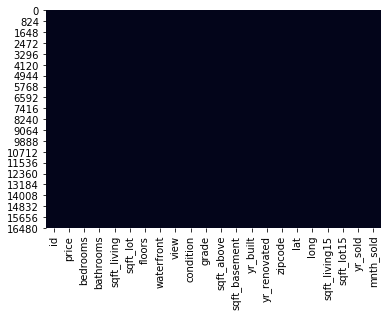

In [15]:
# check for missing vlaues using heatmap
sns.heatmap(df2.isna(), cbar=False)

In [16]:
# show value counts for all columns to check for unsual values
describe = [df2[x].describe() for x in df2.columns]
describe

[count    1.729000e+04
 mean     4.565502e+09
 std      2.874656e+09
 min      1.000102e+06
 25%      2.114701e+09
 50%      3.903650e+09
 75%      7.301150e+09
 max      9.900000e+09
 Name: id, dtype: float64,
 count    1.729000e+04
 mean     5.407395e+05
 std      3.733190e+05
 min      7.500000e+04
 25%      3.210000e+05
 50%      4.500000e+05
 75%      6.450000e+05
 max      7.700000e+06
 Name: price, dtype: float64,
 count    17290.000000
 mean         3.372470
 std          0.939346
 min          0.000000
 25%          3.000000
 50%          3.000000
 75%          4.000000
 max         33.000000
 Name: bedrooms, dtype: float64,
 count    17290.000000
 mean         2.111943
 std          0.770476
 min          0.000000
 25%          1.500000
 50%          2.250000
 75%          2.500000
 max          8.000000
 Name: bathrooms, dtype: float64,
 count    17290.000000
 mean      2081.464604
 std        920.018539
 min        290.000000
 25%       1430.000000
 50%       1920.000000
 7

**Price**

In [17]:
# missing values?
df2['price'].isna().mean()

0.0

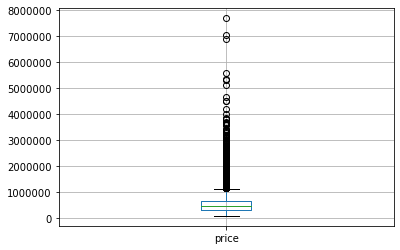

In [18]:
# look at value distribution
df2.boxplot(['price'])

There are some extreme values here for *price*

**Bedrooms**

In [19]:
# check houses with more than 10 bedrooms (they may be extreme)
df2[df2['bedrooms'] >= 10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold
2356,1773100755,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,2014,Aug
3680,8812401450,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,2014,Dec
8597,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014,Jun
11181,627300145,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,2014,Aug
17114,5566100170,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,2014,Oct


Googled each house id to veryify their number of bathrooms. If there is no value, replace with overall number of bedrooms mean.

In [20]:
# replace bedroom values 11 and 33 with 4 and 3, respectivly
df2['bedrooms'] = df2['bedrooms'].replace({11:4, 33:3})

In [21]:
# check mean
df2['bedrooms'].mean()

3.3703296703296703

In [22]:
# index into each id and replace the apporpriate values where necessary
df2.loc[df2.id == 8812401450, 'bedrooms'] = 9
df2.loc[df2.id == 8812401450, 'bathrooms'] = 3.5

df2.loc[df2.id == 627300145, 'bedrooms'] = df2['bedrooms'].mean()

df2.loc[df2.id == 5566100170, 'bedrooms'] = 9
df2.loc[df2.id == 5566100170, 'bathrooms'] = 3.5

In [23]:
# check there are no more extreme bedrooms values
df2[df2['bedrooms']>=10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold


In [24]:
# check if any houses have no bedrooms, possibly by mistake
df2[df2['bedrooms']== 0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold
483,3374500520,355000.0,0.0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,2015,Apr
1120,6306400140,1095000.0,0.0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,2014,Jun
2430,1222029077,265000.0,0.0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341,2014,Oct
3032,7849202190,235000.0,0.0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,2014,Dec
3609,2569500210,339950.0,0.0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,2014,Nov
5424,3918400017,380000.0,0.0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,2015,Feb
6409,1453602309,288000.0,0.0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,2014,Aug
9286,2954400190,1295650.0,0.0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,2014,Jun
10067,3980300371,142000.0,0.0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,2014,Sep
10074,2310060040,240000.0,0.0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,2014,Sep


In [25]:
# meticulously fix the bedrooms labeled 0
df2.loc[df2.id == 3374500520, 'bedrooms'] = 4
df2.loc[df2.id == 6306400140, 'bedrooms'] = 4
df2.loc[df2.id == 1222029077, 'bedrooms'] = 6
df2.loc[df2.id == 7849202190, 'bedrooms'] = df2['bedrooms'].mean()
df2.loc[df2.id == 2569500210, 'bedrooms'] = 4
df2.loc[df2.id == 3918400017, 'bedrooms'] = 3
df2.loc[df2.id == 1453602309, 'bedrooms'] = df2['bedrooms'].mean()
df2.loc[df2.id == 2954400190, 'bedrooms'] = 4
df2.loc[df2.id == 3980300371, 'bedrooms'] = df2['bedrooms'].mean()
df2.loc[df2.id == 2310060040, 'bedrooms'] = df2['bedrooms'].mean()
df2.loc[df2.id == 6896300380, 'bedrooms'] = 3
df2.loc[df2.id == 7849202299, 'bedrooms'] = df2['bedrooms'].mean()

In [26]:
# check
df2[df2['bedrooms']== 0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold


**Bathrooms**

Repeat the same process from bedrooms on bathrooms.

In [27]:
df2[df2['bathrooms']== 0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold
483,3374500520,355000.0,4.000000,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,2015,Apr
1120,6306400140,1095000.0,4.000000,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,2014,Jun
3032,7849202190,235000.0,3.370640,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,2014,Dec
5424,3918400017,380000.0,3.000000,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,2015,Feb
9060,3421079032,75000.0,1.000000,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882,2015,Feb
9286,2954400190,1295650.0,4.000000,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,2014,Jun
10067,3980300371,142000.0,3.371666,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,2014,Sep
12982,203100435,484000.0,1.000000,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290,2014,Sep


In [28]:
df2.loc[df2.id == 3374500520, 'bathrooms'] = 2.5
df2.loc[df2.id == 6306400140, 'bathrooms'] = 5
df2.loc[df2.id == 7849202190, 'bathrooms'] = df2['bathrooms'].mean()
df2.loc[df2.id == 3918400017, 'bathrooms'] = 2.5
df2.loc[df2.id == 3421079032, 'bathrooms'] = df2['bathrooms'].mean()
df2.loc[df2.id == 2954400190, 'bathrooms'] = 4.5
df2.loc[df2.id == 3980300371, 'bathrooms'] = df2['bathrooms'].mean()
df2.loc[df2.id == 203100435, 'bathrooms'] = df2['bathrooms'].mean()

In [29]:
df2[df2['bathrooms']== 0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold


In [30]:
# there are no hoouse with bathrooms more than 10
df2[df2['bathrooms']>=10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold


Save extreme value changes with cleaned data to new dataframe as another checkpoint.

In [31]:
df2.to_csv('kc_house_data_train_3.csv')

# Data Analysis

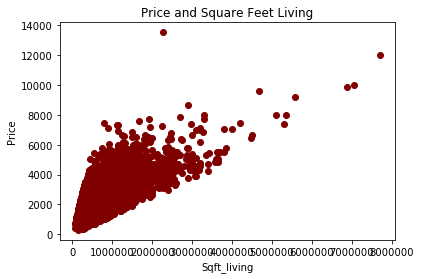

In [32]:
# visualize how price is affected by sqft of livivng space
plt.scatter(df2.price,df2.sqft_living, color = 'maroon')
plt.title("Price and Square Feet Living")
plt.xlabel("Sqft_living")
plt.ylabel("Price")
plt.show()

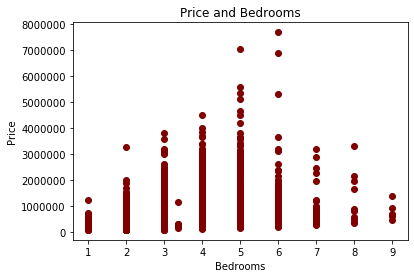

In [33]:
# visualize which number of bedrooms is typically more expensive
plt.scatter(df2.bedrooms,df2.price, color = 'maroon')
plt.title("Price and Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

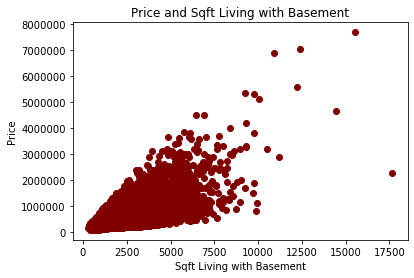

In [34]:
# visualize if having a basement affects the relationship between sqft_living and price
plt.scatter((df2['sqft_living']+df2['sqft_basement']),df2['price'], color = 'maroon')
plt.title("Price and Sqft Living with Basement")
plt.xlabel("Sqft Living with Basement")
plt.ylabel("Price")
plt.show()

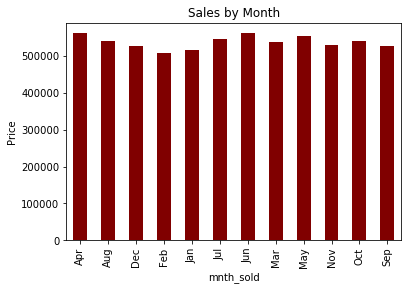

In [35]:
# Plot the month data against price, is there a trend?
mnth_df2 = pd.concat([df2['mnth_sold'], df2['price']], axis=1)
mnth_df2.groupby(['mnth_sold']).price.mean().plot(kind='bar', color = 'maroon')
plt.ylabel('Price')
plt.title("Sales by Month");

**Does the number of times a house has been viewed affect it's price?**

In [36]:
# check value counts
df2['view'].value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

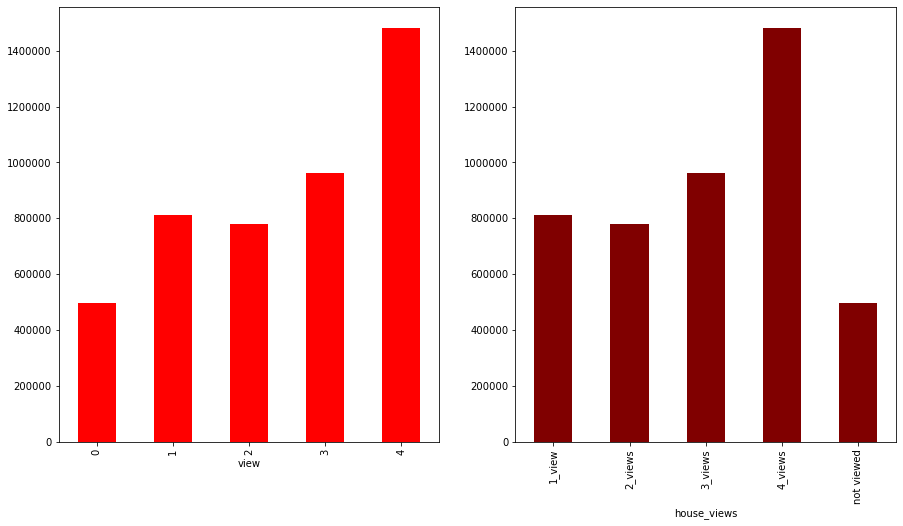

In [37]:
# plot each view value in a group
fig = plt.figure(figsize=(15,8))
df2.groupby(['view'])['price'].mean().plot(kind='bar', ax=fig.add_subplot(121), color = 'red')

# create variables to group the views of houses
view_types = [df['view']== 1, df['view']== 2, df['view']== 3, df['view']== 4]
labels = ['1_view', '2_views', '3_views', '4_views']

# if the how was not viewed, label as not_viewed
df2['house_views'] = np.select(view_types, labels, default = 'not viewed')

# plot new variables
df2.groupby(['house_views'])['price'].mean().plot(kind='bar', ax=fig.add_subplot(122), color = 'maroon');

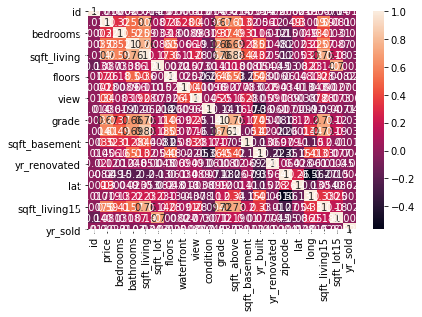

In [38]:
sns.heatmap(df2.corr(),  annot = True)

**Handling Lat and Long**

How can we use latitude and longitude?

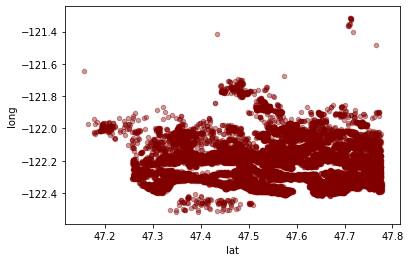

In [39]:
# plot the data to visualize a simple map
df2.plot(kind="scatter", x="lat", y="long", alpha=0.4, color = 'maroon')
plt.show()

<Figure size 720x720 with 0 Axes>

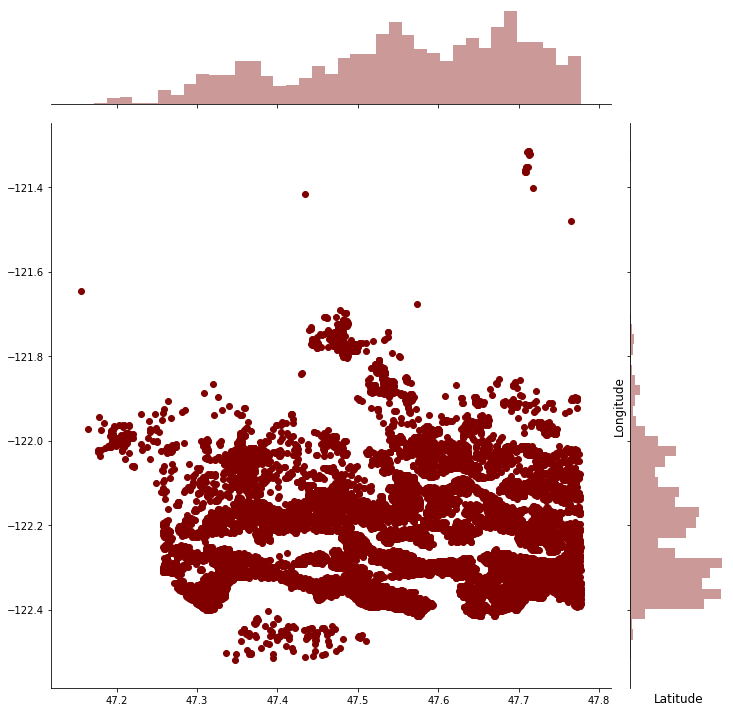

In [40]:
# plot the coordinated in conjunction to their polulation density
plt.figure(figsize = (10,10))
sns.jointplot(x=df2.lat.values, y=df2.long.values, height = 10, color = 'maroon')
plt.ylabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.show()

# Feature Engineering

## Latitude and Longitude

In [41]:
# google coordinates of the Space Needle in Seattle
space_needle_coords = (47.647628111373635, -122.34727472046359)

In [42]:
# create a tuple of lat and long
df_coords = list(zip(df2['lat'], df2['long']))

In [43]:
# iterate through the dataframe using haversine to calulate distance
dist_frm_space_needle = []
for x in df_coords:
    loc1 = x
    loc2 = space_needle_coords
    dist_frm_space_needle.append(hs.haversine(loc2,loc1,unit='mi'))
dist_frm_space_needle

[16.818362897516163,
 3.5941790403328224,
 11.67483688278454,
 6.605938023149793,
 12.355724715562209,
 19.25527753069647,
 9.496920356003764,
 2.4211002447974534,
 15.18412826850154,
 1.132227642087952,
 3.66604932106643,
 8.796438328951165,
 12.287275133090244,
 7.793425479049207,
 45.939611815125936,
 12.734495236361212,
 6.6167569007615,
 16.872876057996116,
 7.758047111485238,
 13.4694569725731,
 4.13062402299271,
 25.172557455899486,
 16.28495742421002,
 6.498554179306528,
 2.6299260760166967,
 13.515569997904674,
 30.11549273035735,
 6.55850034509271,
 34.14604261569288,
 0.8498705434016985,
 33.99448227522352,
 5.48469833089236,
 10.973054161063482,
 24.125986149969485,
 7.7101057763814245,
 8.805650048991867,
 17.208083953893304,
 21.579841307351796,
 7.877547954320178,
 6.97437214228554,
 12.948692485897617,
 6.866113430240498,
 26.931467264591337,
 23.88540368294106,
 28.366558577599697,
 13.54052000091968,
 7.928097058141501,
 3.5145885589626467,
 9.04938528227604,
 2.66028

In [44]:
# create new column for distance from Space Needle in miles
df2['dist_frm_space_needle'] = dist_frm_space_needle

Text(0.5, 1.0, 'Price vs dist_frm_space_needle')

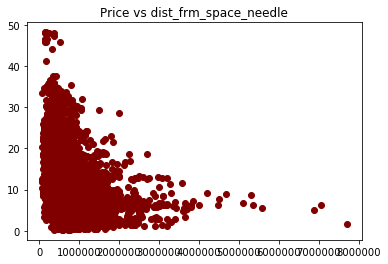

In [45]:
# is there any relaitionship?
plt.scatter(df2.price,df2.dist_frm_space_needle, color = 'maroon')
plt.title("Price vs dist_frm_space_needle")

## Dummies

Get dummy values for discrete data.

In [46]:
df2 = pd.get_dummies(df2, columns=['zipcode'], drop_first=True)

In [47]:
df2 = pd.get_dummies(df2, columns=['waterfront'], drop_first=True)

In [48]:
df2 = pd.get_dummies(df2, columns=['mnth_sold'], drop_first=True)

## More features

In [49]:
# feature for houses that do not pass code standard
df2['no_bld_code_std'] = np.where(df2['grade']<= 5, 1, 0)

In [50]:
# feature for houses with a custom design
df2['custom_bld_desgin'] = np.where(df2['grade']>= 11, 1, 0)

In [51]:
df2['grade_6'] = np.where(df2['grade'] == 6, 1, 0)
df2['grade_7'] = np.where(df2['grade'] == 7, 1, 0)
df2['grade_8'] = np.where(df2['grade'] == 8, 1, 0)
df2['grade_9'] = np.where(df2['grade'] == 9, 1, 0)
df2['grade_10'] = np.where(df2['grade'] == 10, 1, 0)

In [52]:
# check new columns against old
grade_df = df2[['grade', 'custom_bld_desgin', 'no_bld_code_std', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10']]
grade_df

,grade,custom_bld_desgin,no_bld_code_std,grade_6,grade_7,grade_8,grade_9,grade_10
0,8,0,0,0,0,1,0,0
1,8,0,0,0,0,1,0,0
2,11,1,0,0,0,0,0,0
3,12,1,0,0,0,0,0,0
4,9,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
17285,8,0,0,0,0,1,0,0
17286,7,0,0,0,1,0,0,0
17287,7,0,0,0,1,0,0,0
17288,7,0,0,0,1,0,0,0


In [53]:
# feature for houses with a basement
df2['has_basement'] = np.where(df2['sqft_basement'] > 0, 1, 0)

In [54]:
# feature for houses with renovations
df2['has_renovation'] = np.where(df2['yr_renovated'] > 0, 1, 0)

In [55]:
# square bedrooms and bathrooms values
df2["bedroom_squared"] = df2["bedrooms"] ** 2
df2["bathroom_squared"] = df2["bathrooms"] ** 2

Save features and dummies to new df as check point.

In [56]:
df2.to_csv('kc_house_data_train_3.csv')

# Feature Selections

## Choose Features

In [57]:
df3 = pd.read_csv('kc_house_data_train_3.csv', index_col = 0)
print(df3.shape)
df3.head()

(17290, 113)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,yr_sold,house_views,dist_frm_space_needle,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1,mnth_sold_Aug,mnth_sold_Dec,mnth_sold_Feb,mnth_sold_Jan,mnth_sold_Jul,mnth_sold_Jun,mnth_sold_Mar,mnth_sold_May,mnth_sold_Nov,mnth_sold_Oct,mnth_sold_Sep,no_bld_code_std,custom_bld_desgin,grade_6,grade_7,grade_8,grade_9,grade_10,has_basement,has_renovation,bedroom_squared,bathroom_squared
0,2591820310,365000.0,4.0,2.25,2070,8893,2.0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,2014,not viewed,16.818363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,16.0,5.0625
1,7974200820,865000.0,5.0,3.00,2900,6730,1.0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,2014,not viewed,3.594179,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,25.0,9.0000
2,7701450110,1038000.0,4.0,2.50,3770,10893,2.0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,2014,2_views,11.674837,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,16.0,6.2500
3,9522300010,1490000.0,3.0,3.50,4560,14608,2.0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,2015,2_views,6.605938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,9.0,12.2500
4,9510861140,711000.0,3.0,2.50,2550,5376,2.0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,2014,not viewed,12.355725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9.0,6.2500


In [58]:
leave2 = ['price', 'id', 'bedrooms', 'bathrooms', 'yr_built', 'floors', 'house_views', 'grade', 'sqft_basement', 'lat', 'long',  'condition', 'yr_sold','yr_renovated', 'sqft_lot15', 'mnth_sold', 'id']
features = [x for x in df3.columns if x not in leave2]
print(leave2)
print(features)

['price', 'id', 'bedrooms', 'bathrooms', 'yr_built', 'floors', 'house_views', 'grade', 'sqft_basement', 'lat', 'long', 'condition', 'yr_sold', 'yr_renovated', 'sqft_lot15', 'mnth_sold', 'id']
['sqft_living', 'sqft_lot', 'view', 'sqft_above', 'sqft_living15', 'dist_frm_space_needle', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'z

In [59]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df3[features].values, i) for i in range(df3[features].shape[1])]
vif["features"] = df3[features].columns
vif.round(1)

,VIF Factor,features
0,16.7,sqft_living
1,1.2,sqft_lot
2,1.5,view
3,15.8,sqft_above
4,3.3,sqft_living15
...,...,...
93,23.7,grade_10
94,3.6,has_basement
95,1.0,has_renovation
96,1.7,bedroom_squared


## Polynomial Feature

In [60]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)

In [61]:
poly2_data = poly2.fit_transform(df3[features])


poly2_columns = poly2.get_feature_names(features)

df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)

df_poly2.head()

,sqft_living,sqft_lot,view,sqft_above,sqft_living15,dist_frm_space_needle,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_1,mnth_sold_Aug,mnth_sold_Dec,mnth_sold_Feb,mnth_sold_Jan,mnth_sold_Jul,mnth_sold_Jun,mnth_sold_Mar,mnth_sold_May,mnth_sold_Nov,mnth_sold_Oct,mnth_sold_Sep,no_bld_code_std,custom_bld_desgin,grade_6,grade_7,grade_8,grade_9,grade_10,has_basement,has_renovation,bedroom_squared,bathroom_squared,sqft_living^2,sqft_living sqft_lot,...,mnth_sold_Nov grade_6,mnth_sold_Nov grade_7,mnth_sold_Nov grade_8,mnth_sold_Nov grade_9,mnth_sold_Nov grade_10,mnth_sold_Nov has_basement,mnth_sold_Nov has_renovation,mnth_sold_Nov bedroom_squared,mnth_sold_Nov bathroom_squared,mnth_sold_Oct^2,mnth_sold_Oct mnth_sold_Sep,mnth_sold_Oct no_bld_code_std,mnth_sold_Oct custom_bld_desgin,mnth_sold_Oct grade_6,mnth_sold_Oct grade_7,mnth_sold_Oct grade_8,mnth_sold_Oct grade_9,mnth_sold_Oct grade_10,mnth_sold_Oct has_basement,mnth_sold_Oct has_renovation,mnth_sold_Oct bedroom_squared,mnth_sold_Oct bathroom_squared,mnth_sold_Sep^2,mnth_sold_Sep no_bld_code_std,mnth_sold_Sep custom_bld_desgin,mnth_sold_Sep grade_6,mnth_sold_Sep grade_7,mnth_sold_Sep grade_8,mnth_sold_Sep grade_9,mnth_sold_Sep grade_10,mnth_sold_Sep has_basement,mnth_sold_Sep has_renovation,mnth_sold_Sep bedroom_squared,mnth_sold_Sep bathroom_squared,no_bld_code_std^2,no_bld_code_std custom_bld_desgin,no_bld_code_std grade_6,no_bld_code_std grade_7,no_bld_code_std grade_8,no_bld_code_std grade_9,no_bld_code_std grade_10,no_bld_code_std has_basement,no_bld_code_std has_renovation,no_bld_code_std bedroom_squared,no_bld_code_std bathroom_squared,custom_bld_desgin^2,custom_bld_desgin grade_6,custom_bld_desgin grade_7,custom_bld_desgin grade_8,custom_bld_desgin grade_9,custom_bld_desgin grade_10,custom_bld_desgin has_basement,custom_bld_desgin has_renovation,custom_bld_desgin bedroom_squared,custom_bld_desgin bathroom_squared,grade_6^2,grade_6 grade_7,grade_6 grade_8,grade_6 grade_9,grade_6 grade_10,grade_6 has_basement,grade_6 has_renovation,grade_6 bedroom_squared,grade_6 bathroom_squared,grade_7^2,grade_7 grade_8,grade_7 grade_9,grade_7 grade_10,grade_7 has_basement,grade_7 has_renovation,grade_7 bedroom_squared,grade_7 bathroom_squared,grade_8^2,grade_8 grade_9,grade_8 grade_10,grade_8 has_basement,grade_8 has_renovation,grade_8 bedroom_squared,grade_8 bathroom_squared,grade_9^2,grade_9 grade_10,grade_9 has_basement,grade_9 has_renovation,grade_9 bedroom_squared,grade_9 bathroom_squared,grade_10^2,grade_10 has_basement,grade_10 has_renovation,grade_10 bedroom_squared,grade_10 bathroom_squared,has_basement^2,has_basement has_renovation,has_basement bedroom_squared,has_basement bathroom_squared,has_renovation^2,has_renovation bedroom_squared,has_renovation bathroom_squared,bedroom_squared^2,bedroom_squared bathroom_squared,bathroom_squared^2
0,2070.0,8893.0,0.0,2070.0,2390.0,16.818363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Poly2 Test-Train Spit

In [62]:
#call train_test_split on the data and capture the results
X_poly2_train, X_poly2_test, y_train, y_test = train_test_split(df_poly2, df['price'], random_state=25,test_size=0.2)

In [63]:
#check the shape of the results
print("Training set - Features: ", X_poly2_train.shape, "Target: ", y_train.shape)
print("Testing set - Features: ", X_poly2_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 4949) Target:  (13832,)
Testing set - Features:  (3458, 4949) Target:  (3458,)


**Fit Scaler**

In [64]:
# from sklearn.preprocessing import StandardScaler

poly2_scaler = StandardScaler()


#fit and transform the training data
Xs_poly2_train = pd.DataFrame(data=poly2_scaler.fit_transform(X_poly2_train), columns=df_poly2.columns)


In [65]:
# Transform testing data
Xs_poly2_test = pd.DataFrame(data=poly2_scaler.transform(X_poly2_test), columns=df_poly2.columns)

### Linear Regression Scaled Polynomials

In [66]:
# instantiate a linear regression object
lm_poly2 = LinearRegression()

#fit the linear regression to the data
lm_poly2 = lm_poly2.fit(X_poly2_train, y_train)

y_train_pred = lm_poly2.predict(X_poly2_train)

poly2_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Polynomial 2 Training Root Mean Squared Error:' , poly2_train_rmse)

Polynomial 2 Training Root Mean Squared Error: 90187.32220845524


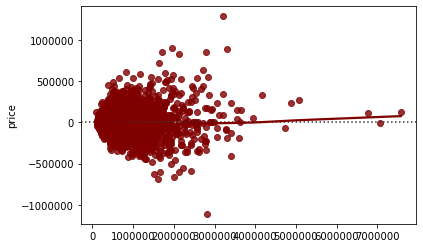

In [67]:
sns.residplot(y_train_pred, y_train, lowess=True, color="maroon")

** Use Polylnomial 2 model to predict on training and testing data.**

In [68]:
y_train_pred = lm_poly2.predict(X_poly2_train)
y_test_pred = lm_poly2.predict(X_poly2_test)

poly2_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
poly2_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Polynomial Training Root Mean Squared Error:' , poly2_train_rmse)
print('Polynomial Testing Root Mean Squared Error:' , poly2_test_rmse)

Polynomial Training Root Mean Squared Error: 90187.32220845524
Polynomial Testing Root Mean Squared Error: 131162.42024751563


In [69]:
# check for overfitting
print('Training: ', int(poly2_train_rmse), "vs. Testing: ", int(poly2_test_rmse))

Training:  90187 vs. Testing:  131162


There is overfitting on the training data so that shows, some of our values are showing some multicolineariy in our train set. 

We can use **KBest** to narrow down our features.

### KBest Polynomials

In [70]:
selector = SelectKBest(f_regression, k=200) # select the 200 best features using their f-statistic

selector.fit(X_poly2_train, y_train)

C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=200, score_func=<function f_regression at 0x0000021FC9CF2620>)

In [71]:
selected_poly2_columns = X_poly2_train.columns[selector.get_support()] # shows me all the columns htat are kept
removed_poly2_columns = X_poly2_train.columns[~selector.get_support()] # shows me all the columns htat are not kept
Xsc_poly2_train = X_poly2_train[selected_poly2_columns]
Xsc_poly2_test = X_poly2_test[selected_poly2_columns]

In [72]:
#instantiate a linear regression object
lm_poly2_kbest = LinearRegression()

#fit the linear regression to the data
lm_poly2_kbest.fit(Xsc_poly2_train, y_train)

y_train_kbest = lm_poly2_kbest.predict(Xsc_poly2_train)


p2_trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , p2_trainK_rmse)

y_kbest = lm_poly2_kbest.predict(Xsc_poly2_test)

p2_testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , p2_testK_rmse)




Training Root Mean Squared Error: 131844.8882556485
Testing Root Mean Squared Error: 140287.29433615893


There is still test set overfitting, let's try a different model using the same selected columns.

### Recursive Feature Polynomials

In [73]:
ols = LinearRegression()

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=7, scoring='neg_mean_squared_error', n_jobs=10, verbose=0)

# Fit recursive feature eliminator 
selector.fit(Xsc_poly2_train, y_train)

RFECV(cv=7,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=10, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [74]:
selected_poly2_rfe = Xsc_poly2_train.columns[selector.support_]
removed_poly2_rfe = Xsc_poly2_train.columns[~selector.support_]
len(list(selected_poly2_rfe))

200

In [75]:
#instantiate a linear regression object
lm_poly2_rfe = LinearRegression()

#fit the linear regression to the data
lm_poly2_rfe = lm_poly2_rfe.fit(X_poly2_train[selected_poly2_rfe], y_train)

y_rfe = lm_poly2_rfe.predict(X_poly2_train[selected_poly2_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_poly2_rfe.predict(X_poly2_test[selected_poly2_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)




Training Root Mean Squared Error: 131844.8882556485
Testing Root Mean Squared Error: 140287.29433615893


Maybe Polynomials aren't the features we need. Try models with only **scaled** data in a linear regression model.

## Scaled Data

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df3[features], df['price'], random_state=9,test_size=0.2)

In [77]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train) # fitting helps the model learn the mean and std of each feature in each column

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df3[features].columns) # transforming the training datat and turinging it into a df

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df3[features].columns)

### Linear Regression Scalar

In [78]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 159781.95443432243


In [79]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 157283.23949506195
Training:  159781 vs. Testing:  157283


### LASSO

In [80]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )




Training Error: 92656.29953330559
Testing Error: 157283.23949506195


C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7844761021145.906, tolerance: 194982925380.51126
  positive)


In [81]:
X_train.shape

(13832, 98)

### KBest Scalar

In [82]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k= 'all') # select the 20 best features using their f-statistic

selector.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x0000021FC9CF2620>)

In [83]:
selected_columns = X_train.columns[selector.get_support()] 
removed_columns = X_train.columns[~selector.get_support()]
Xsc_train = X_train[selected_columns]
Xsc_test = X_test[selected_columns]

In [84]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(Xsc_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(Xsc_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(Xsc_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)




Training Root Mean Squared Error: 159781.95443432243
Testing Root Mean Squared Error: 157283.23949506195


From the lack of overfitting in our training data, we can make an assumption that we have a good model. The way we can test this is by apply these same data cleaning and feature engineering methods to the holdout set. 

# Save final model using pickle

In [85]:
scaler = StandardScaler()

#fit and transform the  data (the entire set, not just the 80%)
df = pd.DataFrame(data=scaler.fit_transform(df3[features]), columns=df3[features].columns)

In [86]:
selector = SelectKBest(f_regression, k= 'all')

selector.fit(df3[features], df3['price'])

SelectKBest(k='all', score_func=<function f_regression at 0x0000021FC9CF2620>)

In [87]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [88]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_final.fit(df[selected_columns], df3['price'])

In [89]:
# import pickle # pickle helps us save any python object (you can pickle anything)


# pickle_out = open("final_model.pkl","wb") # pickle the model
# pickle.dump(lm_final, pickle_out)
# pickle_out.close()

In [90]:
# pickle_out = open('final_scaler.pkl', "wb")
# pickle.dump(scaler, pickle_out)
# pickle_out.close()

In [91]:
# pickle_out = open('selected_columns.pkl', "wb")
# pickle.dump(selected_columns, pickle_out)
# pickle_out.close()

# Holdout Dataset

Repeat the exact same data cleaning process as was done in Training Dataset.

## Data Cleaning

In [92]:
dfh = pd.read_csv('kc_house_data_test_features.csv', index_col = 0)
print(dfh.shape)
dfh.head(3)

(4323, 20)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1974300020,20140827T000000,4,2.5,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1974300020,20150218T000000,4,2.5,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,3630020380,20141107T000000,3,2.5,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576


In [93]:
dfh['date'].value_counts

<bound method IndexOpsMixin.value_counts of 0       20140827T000000
1       20150218T000000
2       20141107T000000
3       20141203T000000
4       20150115T000000
             ...       
4318    20140521T000000
4319    20150223T000000
4320    20140623T000000
4321    20150116T000000
4322    20141015T000000
Name: date, Length: 4323, dtype: object>

In [94]:
# create a new array with only dates (uncleaned)
dates_1 = dfh['date'].values
# create a new list to hold the cleaned dates
dates = []
for x in dates_1:
    date = x[:8]
    dates.append(date)
# display new list an check the length is correct
len(dates)

4323

In [95]:
# replace the old unclean dates column with new column and check dype
dfh['date'] = dates
dfh.dtypes 

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [96]:
xs = dfh.date.values
formated = []
for x in xs:
    formats = datetime(year = int(x[:4]), month = int(x[4:6]), day = int(x[6:8]))
#     add formated dates to new list
    formated.append(formats)
# formate the dates so they all have the same format
formated_month = []
formated_year = []
for x in formated:
    formats_month = x.strftime('%b')
    formats_year = x.strftime('%Y')
    formated_month.append(formats_month)
    formated_year.append(formats_year)
print(len(formated_month))
print(len(formated_year))

4323
4323


In [97]:
# create new columns to hold the dates by year and month/day
dfh['yr_sold'] = formated_year
dfh['mnth_sold'] = formated_month

In [101]:
dfh = dfh.drop(columns = 'date')
dfh

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold
0,1974300020,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,2014,Aug
1,1974300020,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918,2015,Feb
2,3630020380,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576,2014,Nov
3,1771000290,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565,2014,Dec
4,5126310470,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916,2015,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,May
4319,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,Feb
4320,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,Jun
4321,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,Jan


In [102]:
dfh[dfh['bedrooms'] >= 10]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold
1964,8812401450,10,3.0,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.32,1810,3745,2014,Dec


In [103]:
dfh.loc[dfh.id == 8812401450, 'bedrooms'] = 9
dfh.loc[dfh.id == 8812401450, 'bathrooms'] = 3.5

In [104]:
dfh[dfh['bedrooms']== 0]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold
1089,1222029077,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341,2014,Oct
2162,3980300371,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,2014,Sep


In [105]:
# meticulously fix the bedrooms labeled 0
dfh.loc[dfh.id == 1222029077, 'bedrooms'] = 6
dfh.loc[dfh.id == 3980300371, 'bedrooms'] = dfh['bedrooms'].mean()

In [106]:
dfh[dfh['bathrooms']== 0]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold
2162,3980300371,3.388388,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,2014,Sep


In [107]:
dfh.loc[dfh.id == 3980300371, 'bathrooms'] = dfh['bathrooms'].mean()

In [108]:
# dfh.to_csv('kc_house_data_test_features_2.csv')
dfh = pd.read_csv('kc_house_data_test_features_2.csv', index_col = 0)

## Feature Engineering
**Lat and Long**

In [109]:
space_needle_coords

(47.647628111373635, -122.34727472046359)

In [110]:
dfh_coords = list(zip(dfh['lat'], dfh['long']))

In [111]:
dist_frm_space_needle = []
for x in dfh_coords:
    loc1 = x
    loc2 = space_needle_coords
    dist_frm_space_needle.append(hs.haversine(loc2,loc1,unit='mi'))
dist_frm_space_needle

[6.5088130653136425,
 6.5088130653136425,
 17.69105706375251,
 14.429996247809338,
 14.752027486541397,
 3.054927880745015,
 22.196439716654137,
 6.695107915267587,
 13.113609447007514,
 5.89795071086978,
 3.187863137734281,
 5.251493853805237,
 0.8317679391209599,
 6.625273433102679,
 4.731199118533626,
 2.1305188211767003,
 0.9076760090195415,
 2.8611246860701116,
 9.97587653470387,
 21.686736432291102,
 10.738016615788526,
 0.9664204899350184,
 8.074644963993565,
 21.38768066740895,
 4.818855865879884,
 10.393647597300086,
 16.584338056999396,
 17.531737582502785,
 15.355556313234095,
 20.58994922929713,
 11.973384864788807,
 2.7353353440549095,
 19.510179651507546,
 19.992873551311842,
 6.018835917072812,
 2.134883036256699,
 23.034421834100698,
 17.254526960735003,
 4.356170174974389,
 22.55511360442182,
 5.4282568531444975,
 23.509495215091192,
 23.869157060218328,
 17.63186400581072,
 14.256309518088923,
 2.8657922227529293,
 13.519758515789375,
 11.23675013484358,
 1.4260184099

In [113]:
dfh['dist_frm_space_needle'] = dist_frm_space_needle

In [114]:
dfh.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sold', 'mnth_sold',
       'dist_frm_space_needle'],
      dtype='object')

In [125]:
dfh = pd.get_dummies(dfh, columns=['zipcode'], drop_first=True)
dfh = pd.get_dummies(dfh, columns=['waterfront'], drop_first=True)
dfh = pd.get_dummies(dfh, columns=['mnth_sold'], drop_first=True)

In [117]:
dfh['no_bld_code_std'] = np.where(dfh['grade']<= 5, 1, 0)

In [118]:
dfh['custom_bld_desgin'] = np.where(dfh['grade']>= 11, 1, 0)

In [119]:
dfh['grade_6'] = np.where(dfh['grade'] == 6, 1, 0)
dfh['grade_7'] = np.where(dfh['grade'] == 7, 1, 0)
dfh['grade_8'] = np.where(dfh['grade'] == 8, 1, 0)
dfh['grade_9'] = np.where(dfh['grade'] == 9, 1, 0)
dfh['grade_10'] = np.where(dfh['grade'] == 10, 1, 0)

In [120]:
dfh['has_basement'] = np.where(dfh['sqft_basement'] > 0, 1, 0)

In [121]:
dfh['has_renovation'] = np.where(dfh['yr_renovated'] > 0, 1, 0)

In [122]:
dfh["bedroom_squared"] = dfh["bedrooms"] ** 2
dfh["bathroom_squared"] = dfh["bathrooms"] ** 2

In [126]:
dfh.shape

(4323, 111)

In [ ]:
# df.to_csv('kc_house_data_test_features_3.csv')

## Model Fit

In [127]:
holdout = pd.read_csv('kc_house_data_test_features_3.csv', index_col=0)

In [ ]:
final_scaler = pickle.load(open('final_scaler.pkl', 'rb'))
final_model = pickle.load(open('final_model.pkl', 'rb'))

In [ ]:
selected_columns = pickle.load(open('selected_columns.pkl', 'rb'))

In [ ]:
transformed_holdout = final_scaler.transform(holdout[selected_columns])

In [ ]:
final_answer = final_model.predict(transformed_holdout)

In [ ]:
pd.DataFrame(final_answer).to_csv('housing_preds_ijeoma_akamnonu.csv')